In [42]:
setwd('/import/pig/')

In [43]:
orth = read.csv('./orthgene.csv')

In [44]:
orth = orth[,c(1,3,7)]

In [45]:
head(orth,2)

,human_symbol,human_ensembl,ensembl
,<chr>,<chr>,<chr>
1,A1BG,ENSG00000121410,ENSSSCG00000004001
2,A1CF,ENSG00000148584,ENSSSCG00000010431


In [46]:
colnames(orth) = c('symbol','hsa.ense','pig.ense')

In [47]:
hsa = read.table('./hum_all_quant_TPM.txt',header =T,sep = '\t',check.names = F)

In [48]:
library(dplyr)

In [49]:
hsa = hsa %>% tibble::rownames_to_column(.,'hsa.ense')

In [50]:
head(hsa,2)

,hsa.ense,CCL_241_1-1,CCL_241_1-2,CCL_241_1-3
,<chr>,<dbl>,<dbl>,<dbl>
1,ENSG00000000003,15.45466,14.81833,14.03907
2,ENSG00000000005,0.00000,0.00000,0.00000


In [51]:
pig = read.table('./pig_all_quant_TPM.txt',header =T,sep = '\t',check.names = F)

In [52]:
dim(pig)

[1] 22516    12

In [53]:
pig = pig %>% tibble::rownames_to_column(.,'pig.ense')

In [54]:
head(pig,2)

,pig.ense,BJ_IPEC-J2__2-1,BJ_IPEC-J2__2-2,BJ_IPEC-J2__2-3,IPEC-J2-1,IPEC-J2-1-1,IPEC-J2-2,IPEC-J2-2-2,IPEC-J2-3,IPEC-J2-3-3,ZS-IPEC-J2-1,ZS-IPEC-J2-2,ZS-IPEC-J2-3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSSSCG00000000002,23.097051,27.21453,30.05088,0,0,0,0,0,0,27.889313,27.882759,28.778730
2,ENSSSCG00000000003,9.224268,10.18265,12.71654,0,0,0,0,0,0,9.341267,9.032492,8.816608


In [55]:
a = left_join(orth,hsa,by = 'hsa.ense')

In [56]:
expr = left_join(a,pig,by = 'pig.ense') 

In [57]:
expr = na.omit(expr)

In [58]:
expr = expr[,-c(2,3)] %>% na.omit() 

In [59]:
expr = expr[!duplicated(expr$symbol),]

In [60]:
rownames(expr) = expr[,1]
expr = expr[,-1]

In [61]:
dim(expr)

[1] 16755    15

In [62]:
tail(expr,2)

,CCL_241_1-1,CCL_241_1-2,CCL_241_1-3,BJ_IPEC-J2__2-1,BJ_IPEC-J2__2-2,BJ_IPEC-J2__2-3,IPEC-J2-1,IPEC-J2-1-1,IPEC-J2-2,IPEC-J2-2-2,IPEC-J2-3,IPEC-J2-3-3,ZS-IPEC-J2-1,ZS-IPEC-J2-2,ZS-IPEC-J2-3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZZEF1,16.91670,11.85571,11.14701,1.177676,1.658669,3.066402,0.2230292,0.2592549,0.07385148,0.08178076,0.08615422,0.07441015,3.150408,3.222243,2.475694
ZZZ3,21.05465,18.21535,18.90015,12.561877,14.804586,19.856138,23.8821454,21.8876995,8.51712106,8.72503550,7.57077571,7.66084182,21.186691,25.132061,18.174463


In [63]:
library(tinyarray)

In [64]:
#expr1 = t(expr) %>%  as.data.frame()

In [65]:
cg=names(tail(sort(apply(expr,1,sd)),3000))
n=expr[cg,]

In [66]:
library(Rtsne)
tsne_out = Rtsne(t(n),perplexity = 1)

In [67]:
colnames(n)

[1] "CCL_241_1-1"     "CCL_241_1-2"     "CCL_241_1-3"     "BJ_IPEC-J2__2-1"
 [5] "BJ_IPEC-J2__2-2" "BJ_IPEC-J2__2-3" "IPEC-J2-1"       "IPEC-J2-1-1"    
 [9] "IPEC-J2-2"       "IPEC-J2-2-2"     "IPEC-J2-3"       "IPEC-J2-3-3"    
[13] "ZS-IPEC-J2-1"    "ZS-IPEC-J2-2"    "ZS-IPEC-J2-3"

In [68]:
group = c(rep('CCL_241',3),rep('BJ_IPEC_J2',3),rep('IPEC_J2',6),rep('ZS_IPEC_J2',3))

In [69]:

pdat = data.frame(tsne_out$Y,factor(group))
colnames(pdat) = c("Y1","Y2","group")
head(pdat)

,Y1,Y2,group
,<dbl>,<dbl>,<fct>
1,27.88835,-159.91598,CCL_241
2,24.86816,-167.42764,CCL_241
3,26.04550,-164.49985,CCL_241
4,-88.43473,58.56592,BJ_IPEC_J2
5,-87.29720,55.62127,BJ_IPEC_J2
6,-85.51732,51.01302,BJ_IPEC_J2


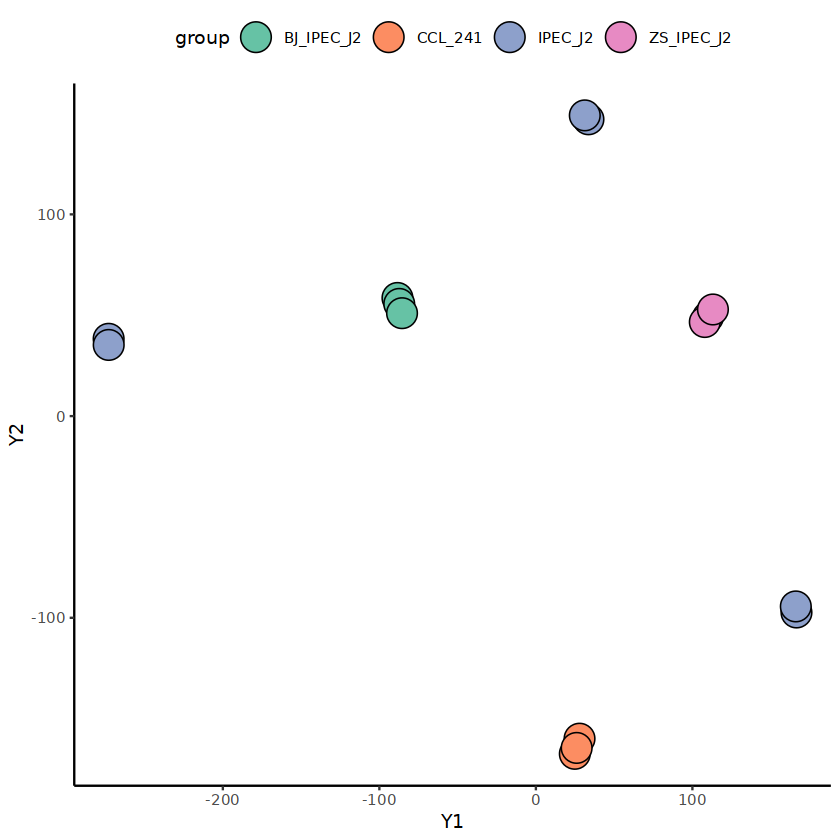

In [70]:
library(ggplot2)
library(paletteer)
ggplot(pdat,aes(Y1,Y2))+
  geom_point(aes(Y1,Y2,fill = group),shape = 21,color = "black",size = 8)+
 
  scale_color_paletteer_d("RColorBrewer::Set2")+
  scale_fill_paletteer_d("RColorBrewer::Set2")+
  theme_classic()+
  theme(legend.position = "top")

 # stat_ellipse(aes(color = group,fill = group),
 #               geom = "polygon",
 #               alpha = 0.3,
 #               linetype = 2)+

In [71]:
ggsave('pca.pdf',width = 7,height = 7)

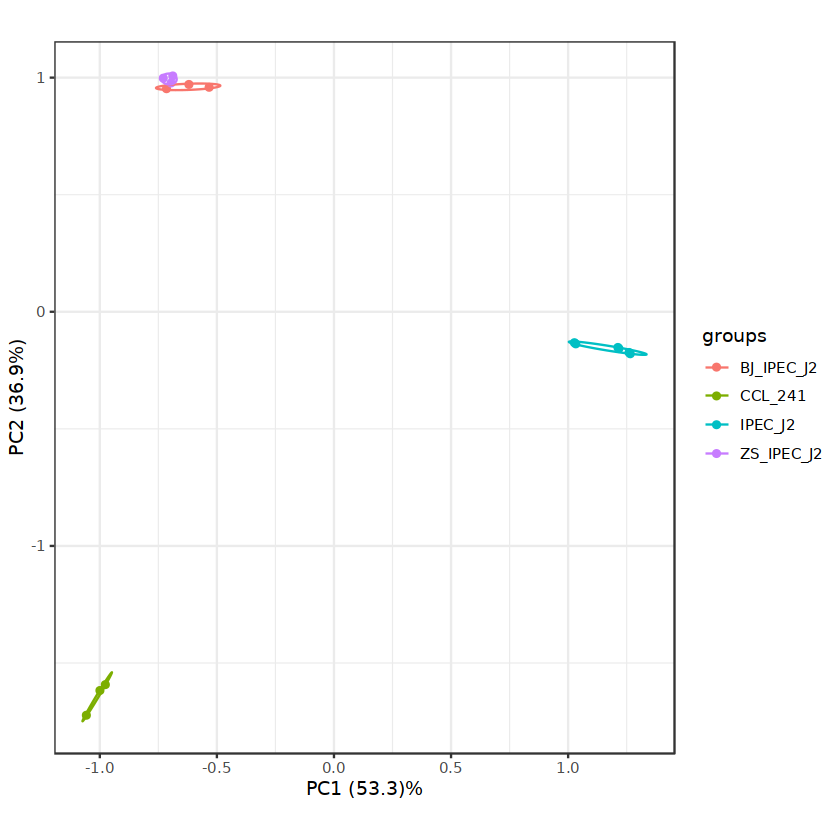

In [72]:
library(ggbiplot)
otu.pca <- prcomp(t(n), scale. = TRUE)
 

ggbiplot(otu.pca, obs.scale = F, var.scale = 1,
         groups = pdat$group, ellipse = TRUE,var.axes = F)+theme_bw() + ylab('PC2 (36.9%)')+
xlab('PC1 (53.3)%')

In [73]:
ggsave('pca2.pdf',width = 7,height = 7)

In [74]:
library(limma)
library(DESeq2)
library(edgeR)

In [ ]:
expr1 = expr[,c(4:15)]
colnames(expr1)
group = c(rep('BJ_IPEC',3),rep('Others',9))
group
data = expr1
group = group
group_list = factor(group)
design <- model.matrix(~0+group_list)
rownames(design) = colnames(data)
colnames(design) <- levels(group_list)

DGElist <- DGEList( counts = data, group = group_list )
keep_gene <- rowSums( cpm(DGElist) > 0.01 ) >= 0.1 # 自定义
table(keep_gene)
DGElist <- DGElist[ keep_gene, , keep.lib.sizes = FALSE ]

DGElist <- calcNormFactors( DGElist )
v <- voom(DGElist, design, plot = TRUE, normalize = "quantile")
fit <- lmFit(v, design)
cont.matrix <- makeContrasts(contrasts = c('BJ_IPEC-Others'), levels = design)

fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2)

nrDEG_limma_voom = topTable(fit2, coef = 'BJ_IPEC-Others', n = Inf)
nrDEG_limma_voom = na.omit(nrDEG_limma_voom)
head(nrDEG_limma_voom)
padj = 0.01 # 自定义
foldChange= 2 # 自定义
nrDEG_limma_voom_signif = nrDEG_limma_voom[(nrDEG_limma_voom$P.Value < padj & 
                          (nrDEG_limma_voom$logFC>foldChange | nrDEG_limma_voom$logFC<(-foldChange))),]
nrDEG_limma_voom_signif = nrDEG_limma_voom_signif[order(nrDEG_limma_voom_signif$logFC),]
dim(nrDEG_limma_voom_signif)
diff = nrDEG_limma_voom
diff$group = as.factor(ifelse(diff$P.Value < padj & abs(diff$logFC) >= foldChange, 
                                 ifelse(diff$logFC> foldChange ,'Up','Down'),'NoSignifi'))
table(diff$group)
write.csv(diff,file = 'BJ_IPEC-Others.diff.gene.csv')
# res = diff
# top_5 <- bind_rows(   
#       res %>%
#         filter(group == 'Up') %>%
#         arrange(P.Value, desc(logFC)) %>%
#         head(0),
#       res %>%
#         filter(group == 'Down') %>%
#         arrange(P.Value, desc(logFC)) %>%
#         head(0)
#     )
# library(ggpubr)
# library(ggplot2)
#     library(dplyr)
#     library(ggrepel)
#     library(ggplot2)
#     library(cowplot)
#     ggplot(data=res,aes(x=logFC,y=-log10(P.Value)))+
#     geom_point(aes(color=group),size=2)+
#     geom_hline(yintercept = -log10(0.01), linetype="dashed",color="grey30")+
#     geom_vline(xintercept = c(-2,2),linetype="dashed",color="grey30")+
#     geom_text_repel(data=top_5,aes(x= logFC,y= -log10(P.Value),label= rownames(top_5)))+
#     scale_color_manual(values = c("#35987F","grey80","#D27356"))+
#     theme_half_open() 
#     ggsave('BJ_IPEC-Others.Volcano.pdf',height = 8,width = 8)


In [88]:
colnames(expr1)

[1] "BJ_IPEC-J2__2-1" "BJ_IPEC-J2__2-2" "BJ_IPEC-J2__2-3" "IPEC-J2-1"      
 [5] "IPEC-J2-1-1"     "IPEC-J2-2"       "IPEC-J2-2-2"     "IPEC-J2-3"      
 [9] "IPEC-J2-3-3"     "ZS-IPEC-J2-1"    "ZS-IPEC-J2-2"    "ZS-IPEC-J2-3"

[1] "BJ_IPEC-J2__2-1" "BJ_IPEC-J2__2-2" "BJ_IPEC-J2__2-3" "IPEC-J2-1"      
 [5] "IPEC-J2-1-1"     "IPEC-J2-2"       "IPEC-J2-2-2"     "IPEC-J2-3"      
 [9] "IPEC-J2-3-3"     "ZS-IPEC-J2-1"    "ZS-IPEC-J2-2"    "ZS-IPEC-J2-3"

[1] "Others" "Others" "Others" "IPEC"   "IPEC"   "IPEC"   "IPEC"   "IPEC"  
 [9] "IPEC"   "Others" "Others" "Others"

keep_gene
FALSE  TRUE 
  808 15947 

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHCHD2,-9.629725,4.654647,-228.4788,5.601897e-22,8.933346e-18,35.56526
LDHB,-9.935565,4.807732,-214.3257,1.149721e-21,9.167303e-18,35.29204
ABHD11,-8.172769,3.926040,-192.8896,3.759623e-21,1.498868e-17,35.10091
REX1BD,-9.684093,4.681548,-201.5072,2.300023e-21,1.222616e-17,35.08668
TRMT112,-7.615764,3.647454,-182.3848,7.056198e-21,2.250504e-17,34.90912
GUK1,-7.678270,3.678761,-162.9465,2.504968e-20,5.353513e-17,34.31621


[1] 4599    6


     Down NoSignifi        Up 
     2313     11348      2286 

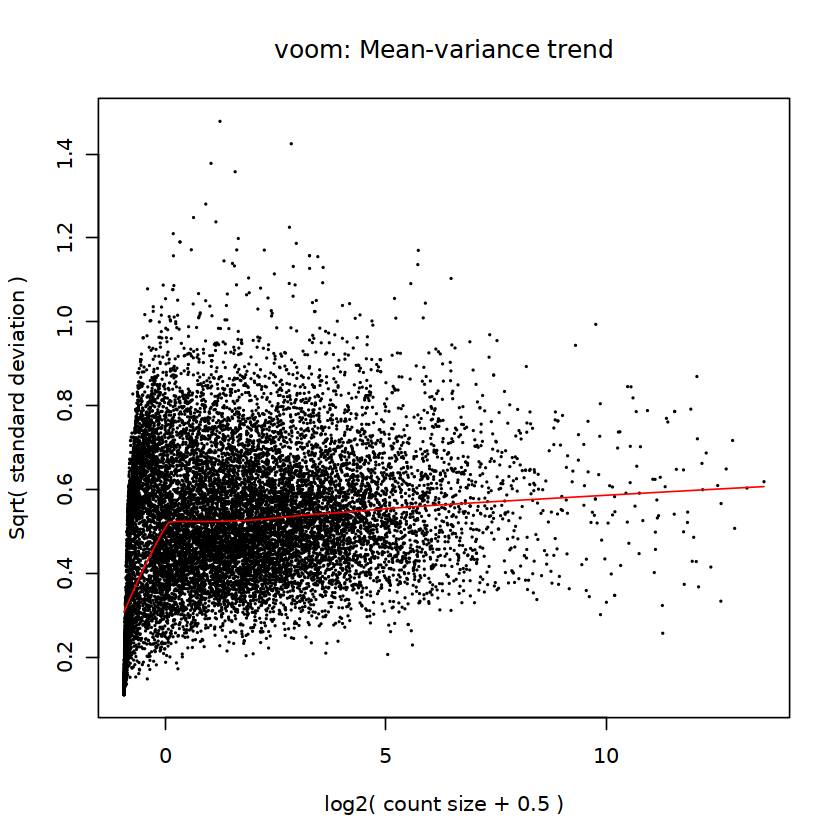

In [89]:
expr1 = expr[,c(4:15)]
colnames(expr1)
group = c(rep('Others',3),rep('IPEC',6),rep('Others',3))
group
data = expr1
group = group
group_list = factor(group)
design <- model.matrix(~0+group_list)
rownames(design) = colnames(data)
colnames(design) <- levels(group_list)

DGElist <- DGEList( counts = data, group = group_list )
keep_gene <- rowSums( cpm(DGElist) > 0.01 ) >= 0.1 # 自定义
table(keep_gene)
DGElist <- DGElist[ keep_gene, , keep.lib.sizes = FALSE ]

DGElist <- calcNormFactors( DGElist )
v <- voom(DGElist, design, plot = TRUE, normalize = "quantile")
fit <- lmFit(v, design)
cont.matrix <- makeContrasts(contrasts = c('IPEC-Others'), levels = design)

fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2)

nrDEG_limma_voom = topTable(fit2, coef = 'IPEC-Others', n = Inf)
nrDEG_limma_voom = na.omit(nrDEG_limma_voom)
head(nrDEG_limma_voom)
padj = 0.01 # 自定义
foldChange= 2 # 自定义
nrDEG_limma_voom_signif = nrDEG_limma_voom[(nrDEG_limma_voom$P.Value < padj & 
                          (nrDEG_limma_voom$logFC>foldChange | nrDEG_limma_voom$logFC<(-foldChange))),]
nrDEG_limma_voom_signif = nrDEG_limma_voom_signif[order(nrDEG_limma_voom_signif$logFC),]
dim(nrDEG_limma_voom_signif)
diff = nrDEG_limma_voom
diff$group = as.factor(ifelse(diff$P.Value < padj & abs(diff$logFC) >= foldChange, 
                                 ifelse(diff$logFC> foldChange ,'Up','Down'),'NoSignifi'))
table(diff$group)
write.csv(diff,file = 'IPEC-Others.diff.gene.csv')
# res = diff

[1] "BJ_IPEC-J2__2-1" "BJ_IPEC-J2__2-2" "BJ_IPEC-J2__2-3" "IPEC-J2-1"      
 [5] "IPEC-J2-1-1"     "IPEC-J2-2"       "IPEC-J2-2-2"     "IPEC-J2-3"      
 [9] "IPEC-J2-3-3"     "ZS-IPEC-J2-1"    "ZS-IPEC-J2-2"    "ZS-IPEC-J2-3"

[1] "Others"  "Others"  "Others"  "Others"  "Others"  "Others"  "Others" 
 [8] "Others"  "Others"  "ZS_IPEC" "ZS_IPEC" "ZS_IPEC"

keep_gene
FALSE  TRUE 
  808 15947 

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CTHRC1,2.728987,0.6106925,17.26112,2.245806e-09,2.544881e-05,11.211913
ADAMTS1,2.893908,3.2087332,16.70494,3.191674e-09,2.544881e-05,10.849025
MARVELD1,3.273868,4.3167460,14.59021,1.351663e-08,7.184988e-05,9.801786
SNX22,3.124712,0.7865099,14.12439,1.905728e-08,7.207230e-05,9.605327
EDIL3,1.837466,0.3558334,13.89837,2.259745e-08,7.207230e-05,9.320696
RPL34,-1.243484,12.9218390,-12.00700,1.045156e-07,2.083389e-04,8.314537


[1] 1140    6


     Down NoSignifi        Up 
      181     14807       959 

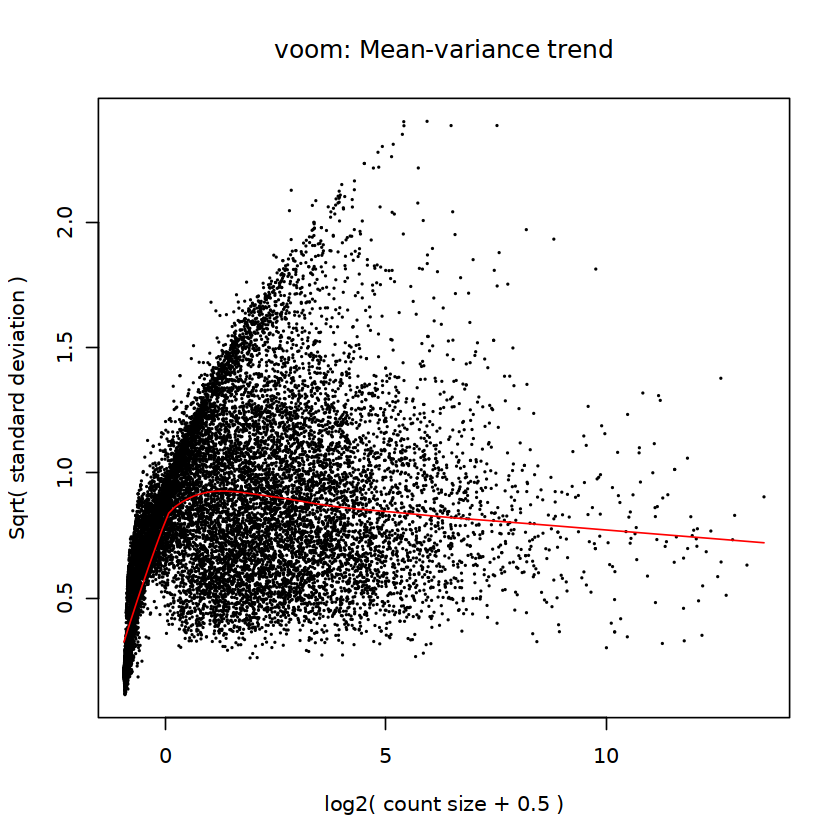

In [91]:
expr1 = expr[,c(4:15)]
colnames(expr1)
group = c(rep('Others',9),rep('ZS_IPEC',3))
group
data = expr1
group = group
group_list = factor(group)
design <- model.matrix(~0+group_list)
rownames(design) = colnames(data)
colnames(design) <- levels(group_list)

DGElist <- DGEList( counts = data, group = group_list )
keep_gene <- rowSums( cpm(DGElist) > 0.01 ) >= 0.1 # 自定义
table(keep_gene)
DGElist <- DGElist[ keep_gene, , keep.lib.sizes = FALSE ]

DGElist <- calcNormFactors( DGElist )
v <- voom(DGElist, design, plot = TRUE, normalize = "quantile")
fit <- lmFit(v, design)
cont.matrix <- makeContrasts(contrasts = c('ZS_IPEC-Others'), levels = design)

fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2)

nrDEG_limma_voom = topTable(fit2, coef = 'ZS_IPEC-Others', n = Inf)
nrDEG_limma_voom = na.omit(nrDEG_limma_voom)
head(nrDEG_limma_voom)
padj = 0.01 # 自定义
foldChange= 2 # 自定义
nrDEG_limma_voom_signif = nrDEG_limma_voom[(nrDEG_limma_voom$P.Value < padj & 
                          (nrDEG_limma_voom$logFC>foldChange | nrDEG_limma_voom$logFC<(-foldChange))),]
nrDEG_limma_voom_signif = nrDEG_limma_voom_signif[order(nrDEG_limma_voom_signif$logFC),]
dim(nrDEG_limma_voom_signif)
diff = nrDEG_limma_voom
diff$group = as.factor(ifelse(diff$P.Value < padj & abs(diff$logFC) >= foldChange, 
                                 ifelse(diff$logFC> foldChange ,'Up','Down'),'NoSignifi'))
table(diff$group)
write.csv(diff,file = 'ZS_IPEC-Others.diff.gene.csv')